In [1]:
import os
import tensorflow as tf
import random
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Layer, Average, concatenate
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
import fnmatch

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
import cv2
import pandas as pd
from tensorflow.keras.layers import BatchNormalization
import time
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials, anneal
import matplotlib.pyplot as plt
import statistics 

In [4]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.applications.xception import  Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
#from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.mobilenet import MobileNet
import tensorflow.keras.callbacks as kcallbacks
import tensorflow.keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
seed=24
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
import seaborn as sns

In [5]:
target_img = (224,224)
input_img = (224,224,3)
batch = 32

train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)
                                #    horizontal_flip=True,
                                #    zoom_range = 0.2,
                                #    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        'All Features/Train_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')
validation_generator = valid_datagen.flow_from_directory(
        'All Features/Test_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')

Found 1391 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [6]:
label = {v: k for k, v in validation_generator.class_indices.items()}
print(label)

{0: '0', 1: '1'}


In [7]:
directory = './All Features/Test_224x224/'

test_images = []

for subdir, _, files in os.walk(directory):
    for file in files:
        if fnmatch.fnmatch(file, '*.png'):
            test_images.append(os.path.join(subdir, file))

test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in test_images]

print(test_labels[0], test_images[0])

1 ./All Features/Test_224x224/1/357.png


In [8]:
y_test = np.array(test_labels).astype(int)
print(y_test.shape)

(652,)


In [9]:
#Test Images 
length = len(test_images)
batch_size = length  # Set the batch size equal to the number of images

# Create an empty array to store the images
images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

for i in range(length):
    test = cv2.imread(test_images[i])
    test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
    img = np.array(test) / 255.0
    
    # Assign the image to the corresponding index in the images array
    images[i] = img

In [10]:
output_unit = 1

In [10]:
def Prediction(model):
#read images from validation folder
    directory = './All Features/Test_224x224/'

    image_files = []

    for subdir, _, files in os.walk(directory):
        for file in files:
            if fnmatch.fnmatch(file, '*.png'):
                image_files.append(os.path.join(subdir, file))

    test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in image_files]
            
    y_test = np.array(test_labels).astype(int)

    #predict=[]
    #length=len(test_images)
    label=validation_generator.class_indices
    label={v: k for k, v in label.items()}
    
    length = len(test_images)
    batch_size = length  # Set the batch size equal to the number of images

    # Create an empty array to store the images
    images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

    for i in range(length):
        test = cv2.imread(test_images[i])
        test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
        img = np.array(test) / 255.

        # Assign the image to the corresponding index in the images array
        images[i] = img
    
    preds = model.predict(images)
    prediction = (preds > 0.5).astype(int)
    accuracy1 = accuracy_score(y_test, prediction)
    print(accuracy1)
    
    return accuracy1

# VGG19

In [69]:
def Vgg19(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper All Features/VGG19_new.h5',input_shape=input_img):
    
    base_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='vgg19')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [70]:
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Vgg19(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper All Features/VGG19_new.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [71]:
space = {
    'frozen': hp.quniform('frozen', 17, 21, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/20                                            

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.82515, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - loss: 1.3245 - accuracy: 0.7491 - val_loss: 0.8034 - val_accuracy: 0.8252 - 7s/epoch - 165ms/step

Epoch 2/20                                            

                                                      
Epoch 2: val_accuracy improved from 0.82515 to 0.85429, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - loss: 0.1403 - accuracy: 0.9648 - val_loss: 1.1356 - val_accuracy: 0.8543 - 6s/epoch - 143ms/step

Epoch 3/20                                            

                                                      
Epoch 3: val_accuracy improved from 0.85429 to 0.85890, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.4712 - val_accuracy: 0.8589 - 6s/epoch - 142ms/step

Epoch 4/20                             

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.79294, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - loss: 1.1619 - accuracy: 0.8756 - val_loss: 0.5111 - val_accuracy: 0.7929 - 7s/epoch - 154ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.79294 to 0.82822, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - loss: 0.0809 - accuracy: 0.9763 - val_loss: 0.4420 - val_accuracy: 0.8282 - 6s/epoch - 141ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.82822 to 0.88650, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - los

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 11s - loss: 2.2816 - accuracy: 0.6089 - val_loss: 0.6755 - val_accuracy: 0.5506 - 11s/epoch - 260ms/step

Epoch 2/25                                                                        

                                                                                  
Epoch 2: val_accuracy improved from 0.55061 to 0.85429, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - loss: 0.5843 - accuracy: 0.7994 - val_loss: 0.4330 - val_accuracy: 0.8543 - 6s/epoch - 146ms/step

Epoch 3/25                                                                        

                                                                                  
Epoch 3: val_accuracy did not improve from 0.85429

44/44 - 6s - loss: 0.2847 - accuracy: 0.9605 - val_loss: 1.4346 - val_accu

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.80215, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - loss: 1.2403 - accuracy: 0.6542 - val_loss: 0.6446 - val_accuracy: 0.8021 - 7s/epoch - 165ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.80215 to 0.94325, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - loss: 0.1807 - accuracy: 0.9389 - val_loss: 0.1720 - val_accuracy: 0.9433 - 6s/epoch - 143ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.94325 to 0.95245, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 6s - los

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 8s - loss: 195.0481 - accuracy: 0.5909 - val_loss: 0.7724 - val_accuracy: 0.5506 - 8s/epoch - 170ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.8548 - accuracy: 0.6600 - val_loss: 0.6885 - val_accuracy: 0.5491 - 6s/epoch - 127ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.6589 - accuracy: 0.6808 - val_loss: 0.6888 - val_accuracy: 0.5506 - 6s/epoch - 127ms/step

Epoch 4/10                      

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.82362, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - loss: 0.9456 - accuracy: 0.7132 - val_loss: 0.4459 - val_accuracy: 0.8236 - 7s/epoch - 167ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.82362 to 0.90184, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 9s - loss: 0.2468 - accuracy: 0.9770 - val_loss: 0.4675 - val_accuracy: 0.9018 - 9s/epoch - 206ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.90184 to 0.94325, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 9s - los

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 8s - loss: 46.3057 - accuracy: 0.5816 - val_loss: 0.7421 - val_accuracy: 0.5506 - 8s/epoch - 173ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.55061 to 0.90184, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - loss: 0.3903 - accuracy: 0.7728 - val_loss: 0.3083 - val_accuracy: 0.9018 - 7s/epoch - 151ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.90184 to 0.91411, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - lo

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.71472, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 8s - loss: 10.8835 - accuracy: 0.6923 - val_loss: 0.7918 - val_accuracy: 0.7147 - 8s/epoch - 172ms/step

Epoch 2/10                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.71472 to 0.81748, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 11s - loss: 0.1126 - accuracy: 0.9569 - val_loss: 0.6698 - val_accuracy: 0.8175 - 11s/epoch - 243ms/step

Epoch 3/10                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.81748 to 0.84202, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 11s -

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 12s - loss: 27.1755 - accuracy: 0.6096 - val_loss: 0.7737 - val_accuracy: 0.5506 - 12s/epoch - 273ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.55061 to 0.57822, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 7s - loss: 6.4129 - accuracy: 0.6470 - val_loss: 0.7792 - val_accuracy: 0.5782 - 7s/epoch - 154ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.57822

44/44 - 6s - loss: 3.6554 - accuracy: 0.6161 - val_loss: 0.7006 - val_accuracy

<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/VGG19_new.h5

44/44 - 8s - loss: 12.4806 - accuracy: 0.5888 - val_loss: 0.6885 - val_accuracy: 0.5506 - 8s/epoch - 181ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.6544 - accuracy: 0.6808 - val_loss: 0.6942 - val_accuracy: 0.5506 - 6s/epoch - 129ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 6s - loss: 0.6329 - accuracy: 0.6808 - val_loss: 0.7111 - val_accuracy: 0.5506 - 6s/epoch - 128ms/step

Epoch 4/25                       

In [90]:
Vgg19(output_unit = 1, frozen=18, unit = 128, epochs=15, patience=4, lr=0.001, dropout_rate=0.3,verbose=1)

Epoch 1/15


<ipython-input-69-5a0357de9652>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 0.8918 - accuracy: 0.6636
Epoch 1: val_accuracy improved from -inf to 0.78067, saving model to ./Reference Paper All Features/VGG19_new.h5
44/44 [==============================] - 7s 147ms/step - loss: 0.8918 - accuracy: 0.6636 - val_loss: 0.5283 - val_accuracy: 0.7807
Epoch 2/15
44/44 [==============================] - ETA: 0s - loss: 0.5249 - accuracy: 0.5917
Epoch 2: val_accuracy did not improve from 0.78067
44/44 [==============================] - 6s 131ms/step - loss: 0.5249 - accuracy: 0.5917 - val_loss: 0.6212 - val_accuracy: 0.5506
Epoch 3/15
44/44 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.9015
Epoch 3: val_accuracy improved from 0.78067 to 0.81288, saving model to ./Reference Paper All Features/VGG19_new.h5
44/44 [==============================] - 7s 155ms/step - loss: 0.3144 - accuracy: 0.9015 - val_loss: 0.9615 - val_accuracy: 0.8129
Epoch 4/15
44/44 [==============================] - ETA:

In [91]:
vgg19 = load_model('./Reference Paper All Features/VGG19_new.h5')

In [92]:
vgg19_pred = vgg19.predict(images)
vgg19_pred = (vgg19_pred > 0.5).astype(int)

In [93]:
accuracy1 = accuracy_score(y_test, vgg19_pred)
precision1 =precision_score(y_test, vgg19_pred, average='macro')
recall = recall_score(y_test, vgg19_pred, average='macro')
f1 = f1_score(y_test, vgg19_pred, average='macro')

output = (
    "Evaluation Metrics of VGG19:\n"
    f"Testing Accuracy: {accuracy1 * 100}\n"
    f"Precision: {precision1}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of VGG19:
Testing Accuracy: 94.78527607361963
Precision: 0.9535483243348412
Recall: 0.9432344301101847
F1-Score: 0.9467933947772658


In [94]:
target_names = ['Normal', 'Attack']
print(classification_report(y_test, vgg19_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.99      0.90      0.94       293
      Attack       0.92      0.99      0.95       359

    accuracy                           0.95       652
   macro avg       0.95      0.94      0.95       652
weighted avg       0.95      0.95      0.95       652



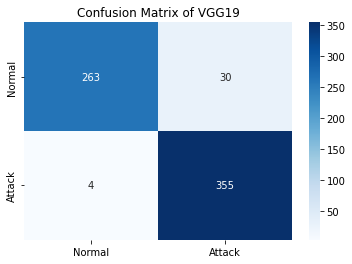

In [95]:
target_names = ['Normal', 'Attack']
conf_mat1 = confusion_matrix(y_test, vgg19_pred)
sns.heatmap(conf_mat1, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG19')
plt.show()

# ResNet50


In [109]:
def Resnet(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper All Features/Resnet50.h5',input_shape=input_img):
    
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='resnet')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [110]:
#122-131
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Resnet(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper All Features/Resnet50.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [157]:
space = {
    'frozen': hp.quniform('frozen', 165, 174, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

Epoch 1/25                                            

  0%|          | 0/10 [00:01<?, ?trial/s, best loss=?]

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.64877, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 13s - loss: 4.3957 - accuracy: 0.8217 - val_loss: 0.8607 - val_accuracy: 0.6488 - 13s/epoch - 287ms/step

Epoch 2/25                                            

                                                      
Epoch 2: val_accuracy improved from 0.64877 to 0.77761, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 8s - loss: 0.2398 - accuracy: 0.9382 - val_loss: 0.4716 - val_accuracy: 0.7776 - 8s/epoch - 172ms/step

Epoch 3/25                                            

                                                      
Epoch 3: val_accuracy did not improve from 0.77761

44/44 - 5s - loss: 0.1484 - accuracy: 0.9432 - val_loss: 0.8088 - val_accuracy: 0.5706 - 5s/epoch - 122ms/step

Epoch 4/25                                            

                                                

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.44939, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 12s - loss: 3.2695 - accuracy: 0.8196 - val_loss: 8.6731 - val_accuracy: 0.4494 - 12s/epoch - 267ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.44939 to 0.84049, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 8s - loss: 0.2627 - accuracy: 0.9145 - val_loss: 0.5549 - val_accuracy: 0.8405 - 8s/epoch - 175ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.84049

44/44 - 5s - loss: 0.0951 - accuracy: 0.9720 - val_loss: 2.8919 - val_accuracy: 0

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 11s - loss: 6.5157 - accuracy: 0.6348 - val_loss: 0.6991 - val_accuracy: 0.5506 - 11s/epoch - 260ms/step

Epoch 2/15                                                                      

                                                                                
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.4039 - accuracy: 0.7728 - val_loss: 0.7007 - val_accuracy: 0.5368 - 5s/epoch - 121ms/step

Epoch 3/15                                                                      

                                                                                
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.4467 - accuracy: 0.8555 - val_loss: 0.7066 - val_accuracy: 0.4494 - 5s/epoch - 118ms/step

Epoch 4/15                            

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 11s - loss: 6.1797 - accuracy: 0.5579 - val_loss: 0.6917 - val_accuracy: 0.5506 - 11s/epoch - 249ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.5855 - accuracy: 0.6808 - val_loss: 0.5373 - val_accuracy: 0.5506 - 5s/epoch - 121ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.5426 - accuracy: 0.6808 - val_loss: 0.4913 - val_accuracy: 0.5506 - 5s/epoch - 120ms/step

Epoch 4/20                       

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.44939, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 12s - loss: 10.6051 - accuracy: 0.6937 - val_loss: 5.1757 - val_accuracy: 0.4494 - 12s/epoch - 263ms/step

Epoch 2/15                                                                      

                                                                                
Epoch 2: val_accuracy improved from 0.44939 to 0.55061, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 8s - loss: 0.2820 - accuracy: 0.8713 - val_loss: 3.2571 - val_accuracy: 0.5506 - 8s/epoch - 175ms/step

Epoch 3/15                                                                      

                                                                                
Epoch 3: val_accuracy did not improve from 0.55061

44/44 - 5s - loss: 0.2302 - accuracy: 0.9202 - val_loss: 5.2902 - val_accuracy: 0.550

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.44939, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 12s - loss: 2.9819 - accuracy: 0.7203 - val_loss: 122.2512 - val_accuracy: 0.4494 - 12s/epoch - 280ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.44939 to 0.64877, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 15s - loss: 0.3747 - accuracy: 0.7958 - val_loss: 12.5369 - val_accuracy: 0.6488 - 15s/epoch - 340ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.64877 to 0.73926, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 7s -

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.87270, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 12s - loss: 7.0707 - accuracy: 0.8253 - val_loss: 0.3888 - val_accuracy: 0.8727 - 12s/epoch - 269ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.87270

44/44 - 5s - loss: 0.1888 - accuracy: 0.9339 - val_loss: 0.7598 - val_accuracy: 0.7193 - 5s/epoch - 121ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.87270

44/44 - 5s - loss: 0.1286 - accuracy: 0.9526 - val_loss: 0.9762 - val_accuracy: 0.6917 - 5s/epoch - 121ms/step

Epoch 4/20                       

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.86810, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 12s - loss: 6.5875 - accuracy: 0.8037 - val_loss: 0.5114 - val_accuracy: 0.8681 - 12s/epoch - 283ms/step

Epoch 2/15                                                                      

                                                                                
Epoch 2: val_accuracy did not improve from 0.86810

44/44 - 5s - loss: 0.1980 - accuracy: 0.9454 - val_loss: 0.8223 - val_accuracy: 0.6748 - 5s/epoch - 119ms/step

Epoch 3/15                                                                      

                                                                                
Epoch 3: val_accuracy improved from 0.86810 to 0.89877, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 15s - loss: 0.1071 - accuracy: 0.9662 - val_loss: 0.3647 - val_accuracy: 0.898

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.60890, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 14s - loss: 11.3386 - accuracy: 0.6477 - val_loss: 2.0658 - val_accuracy: 0.6089 - 14s/epoch - 312ms/step

Epoch 2/15                                                                      

                                                                                
Epoch 2: val_accuracy improved from 0.60890 to 0.86503, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 20s - loss: 0.3309 - accuracy: 0.8907 - val_loss: 0.3707 - val_accuracy: 0.8650 - 20s/epoch - 461ms/step

Epoch 3/15                                                                      

                                                                                
Epoch 3: val_accuracy improved from 0.86503 to 0.87117, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 8s - loss: 

<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.44939, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 12s - loss: 1.9595 - accuracy: 0.8390 - val_loss: 4.9170 - val_accuracy: 0.4494 - 12s/epoch - 263ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.44939 to 0.82209, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 15s - loss: 0.1475 - accuracy: 0.9511 - val_loss: 0.4100 - val_accuracy: 0.8221 - 15s/epoch - 352ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.82209 to 0.85276, saving model to ./Reference Paper All Features/Resnet50.h5

44/44 - 8s - lo

In [160]:
Resnet(output_unit = 1, frozen=172, unit = 384, epochs=25, patience=5, lr=0.002, dropout_rate=0.4, verbose=1)

Epoch 1/25


<ipython-input-109-f828eff1e461>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 9.3375 - accuracy: 0.7922
Epoch 1: val_accuracy improved from -inf to 0.57669, saving model to ./Reference Paper All Features/Resnet50.h5
44/44 [==============================] - 12s 204ms/step - loss: 9.3375 - accuracy: 0.7922 - val_loss: 1.9542 - val_accuracy: 0.5767
Epoch 2/25
44/44 [==============================] - ETA: 0s - loss: 0.3097 - accuracy: 0.9152
Epoch 2: val_accuracy did not improve from 0.57669
44/44 [==============================] - 6s 128ms/step - loss: 0.3097 - accuracy: 0.9152 - val_loss: 0.8293 - val_accuracy: 0.5521
Epoch 3/25
44/44 [==============================] - ETA: 0s - loss: 0.1634 - accuracy: 0.9504
Epoch 3: val_accuracy improved from 0.57669 to 0.57822, saving model to ./Reference Paper All Features/Resnet50.h5
44/44 [==============================] - 14s 333ms/step - loss: 0.1634 - accuracy: 0.9504 - val_loss: 0.7043 - val_accuracy: 0.5782
Epoch 4/25
44/44 [==============================] - ETA:

In [161]:
resnet = load_model('./Reference Paper All Features/Resnet50.h5')

In [162]:
resnet_pred = resnet.predict(images)
resnet_pred = (resnet_pred > 0.5).astype(int)

In [163]:
accuracy3 = accuracy_score(y_test, resnet_pred)
precision3 =precision_score(y_test, resnet_pred, average='macro')
recall3 = recall_score(y_test, resnet_pred, average='macro')
f1_3 = f1_score(y_test, resnet_pred, average='macro')

output = (
    "Evaluation Metrics of Resnet50:\n"
    f"Testing Accuracy: {accuracy3 * 100}\n"
    f"Precision: {precision3}\n"
    f"Recall: {recall3}\n"
    f"F1-Score: {f1_3}"
)

print(output)

Evaluation Metrics of Resnet50:
Testing Accuracy: 92.94478527607362
Precision: 0.9375264031752581
Recall: 0.9233840683734682
F1-Score: 0.9277482269503545


# InceptionV3

In [33]:
def Inception(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper All Features/InceptionV3.h5',input_shape=input_img):
    
    base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='inception')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [36]:
#122-131
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Inception(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper All Features/InceptionV3.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [37]:
space = {
    'frozen': hp.quniform('frozen', 294, 310, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/20                                            

  0%|          | 0/10 [00:02<?, ?trial/s, best loss=?]

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.78374, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 15s - loss: 7.6893 - accuracy: 0.8936 - val_loss: 12.7157 - val_accuracy: 0.7837 - 15s/epoch - 336ms/step

Epoch 2/20                                            

                                                      
Epoch 2: val_accuracy improved from 0.78374 to 0.85123, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 7s - loss: 0.5322 - accuracy: 0.9727 - val_loss: 5.1605 - val_accuracy: 0.8512 - 7s/epoch - 165ms/step

Epoch 3/20                                            

                                                      
Epoch 3: val_accuracy did not improve from 0.85123

44/44 - 5s - loss: 0.1318 - accuracy: 0.9849 - val_loss: 4.9064 - val_accuracy: 0.8344 - 5s/epoch - 120ms/step

Epoch 4/20                                            

                                         

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.82975, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 12s - loss: 8.1148 - accuracy: 0.8900 - val_loss: 7.6777 - val_accuracy: 0.8298 - 12s/epoch - 265ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.82975

44/44 - 5s - loss: 0.1960 - accuracy: 0.9691 - val_loss: 3.0515 - val_accuracy: 0.8083 - 5s/epoch - 119ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.82975 to 0.84816, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 6s - loss: 0.0644 - accuracy: 0.9799 - val_loss: 1.5663 - val_accur

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.84049, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 12s - loss: 3.1616 - accuracy: 0.9152 - val_loss: 5.1044 - val_accuracy: 0.8405 - 12s/epoch - 263ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.84049 to 0.84509, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 7s - loss: 0.5163 - accuracy: 0.9727 - val_loss: 2.4906 - val_accuracy: 0.8451 - 7s/epoch - 159ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.84509

44/44 - 5s - loss: 0.1048 - accuracy: 0.9885 - val_loss: 6.7050 - val_accur

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.84509, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 12s - loss: 12.2785 - accuracy: 0.8857 - val_loss: 7.0245 - val_accuracy: 0.8451 - 12s/epoch - 278ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.84509

44/44 - 5s - loss: 0.8864 - accuracy: 0.9770 - val_loss: 4.3715 - val_accuracy: 0.8390 - 5s/epoch - 119ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.84509

44/44 - 5s - loss: 0.1747 - accuracy: 0.9856 - val_loss: 4.0609 - val_accuracy: 0.8298 - 5s/epoch - 119ms/step

Epoch 4/25                   

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.82669, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 12s - loss: 4.9189 - accuracy: 0.8965 - val_loss: 2.1152 - val_accuracy: 0.8267 - 12s/epoch - 280ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy did not improve from 0.82669

44/44 - 5s - loss: 0.1240 - accuracy: 0.9720 - val_loss: 1.9109 - val_accuracy: 0.8129 - 5s/epoch - 117ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.82669 to 0.84356, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 7s - loss: 0.0894 - accuracy: 0.9741 - val_loss: 0.8126 - val_accur

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.80828, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 13s - loss: 1.7055 - accuracy: 0.9303 - val_loss: 3.1367 - val_accuracy: 0.8083 - 13s/epoch - 302ms/step

Epoch 2/25                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.80828 to 0.94632, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 17s - loss: 0.2735 - accuracy: 0.9863 - val_loss: 0.6091 - val_accuracy: 0.9463 - 17s/epoch - 393ms/step

Epoch 3/25                                                                       

                                                                                 
Epoch 3: val_accuracy did not improve from 0.94632

44/44 - 5s - loss: 0.2462 - accuracy: 0.9863 - val_loss: 13.9687 - val_ac

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.79755, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 13s - loss: 17.1361 - accuracy: 0.8692 - val_loss: 6.0617 - val_accuracy: 0.7975 - 13s/epoch - 292ms/step

Epoch 2/20                                                                      

                                                                                
Epoch 2: val_accuracy improved from 0.79755 to 0.81902, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 8s - loss: 0.1968 - accuracy: 0.9741 - val_loss: 2.3232 - val_accuracy: 0.8190 - 8s/epoch - 181ms/step

Epoch 3/20                                                                      

                                                                                
Epoch 3: val_accuracy improved from 0.81902 to 0.82822, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 8s -

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.81288, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 13s - loss: 6.2737 - accuracy: 0.9073 - val_loss: 11.1994 - val_accuracy: 0.8129 - 13s/epoch - 293ms/step

Epoch 2/25                                                                      

                                                                                
Epoch 2: val_accuracy improved from 0.81288 to 0.84663, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 8s - loss: 0.8403 - accuracy: 0.9748 - val_loss: 5.2482 - val_accuracy: 0.8466 - 8s/epoch - 173ms/step

Epoch 3/25                                                                      

                                                                                
Epoch 3: val_accuracy did not improve from 0.84663

44/44 - 5s - loss: 0.0649 - accuracy: 0.9928 - val_loss: 4.8466 - val_accuracy:

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.82362, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 12s - loss: 3.7142 - accuracy: 0.9123 - val_loss: 3.5445 - val_accuracy: 0.8236 - 12s/epoch - 271ms/step

Epoch 2/20                                                                      

                                                                                
Epoch 2: val_accuracy improved from 0.82362 to 0.84049, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 6s - loss: 0.1413 - accuracy: 0.9806 - val_loss: 3.2412 - val_accuracy: 0.8405 - 6s/epoch - 146ms/step

Epoch 3/20                                                                      

                                                                                
Epoch 3: val_accuracy improved from 0.84049 to 0.85583, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 7s - 

<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                
Epoch 1: val_accuracy improved from -inf to 0.81902, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 13s - loss: 6.0978 - accuracy: 0.9252 - val_loss: 48.7705 - val_accuracy: 0.8190 - 13s/epoch - 285ms/step

Epoch 2/30                                                                      

                                                                                
Epoch 2: val_accuracy improved from 0.81902 to 0.83436, saving model to ./Reference Paper All Features/InceptionV3.h5

44/44 - 14s - loss: 1.1087 - accuracy: 0.9835 - val_loss: 13.2111 - val_accuracy: 0.8344 - 14s/epoch - 322ms/step

Epoch 3/30                                                                      

                                                                                
Epoch 3: val_accuracy did not improve from 0.83436

44/44 - 5s - loss: 1.0295 - accuracy: 0.9763 - val_loss: 21.8718 - val_accur

In [39]:
Inception(output_unit = 1, frozen=296, unit = 512, epochs=25, patience=6, lr=0.001, dropout_rate=0.3, verbose=1)

Epoch 1/25


<ipython-input-33-b8d732182714>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 1.3591 - accuracy: 0.9403
Epoch 1: val_accuracy improved from -inf to 0.85583, saving model to ./Reference Paper All Features/InceptionV3.h5
44/44 [==============================] - 13s 211ms/step - loss: 1.3591 - accuracy: 0.9403 - val_loss: 5.6104 - val_accuracy: 0.8558
Epoch 2/25
44/44 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.9763
Epoch 2: val_accuracy did not improve from 0.85583
44/44 [==============================] - 5s 119ms/step - loss: 0.5142 - accuracy: 0.9763 - val_loss: 8.1051 - val_accuracy: 0.8282
Epoch 3/25
44/44 [==============================] - ETA: 0s - loss: 0.1942 - accuracy: 0.9878
Epoch 3: val_accuracy improved from 0.85583 to 0.88344, saving model to ./Reference Paper All Features/InceptionV3.h5
44/44 [==============================] - 8s 190ms/step - loss: 0.1942 - accuracy: 0.9878 - val_loss: 2.7964 - val_accuracy: 0.8834
Epoch 4/25
43/44 [============================>.] -

In [40]:
inception = load_model('./Reference Paper All Features/InceptionV3.h5')

In [41]:
inception_pred = inception.predict(images)
inception_pred = (inception_pred > 0.5).astype(int)

In [42]:
accuracy3 = accuracy_score(y_test, inception_pred)
precision3 =precision_score(y_test, inception_pred, average='macro')
recall3 = recall_score(y_test, inception_pred, average='macro')
f1_3 = f1_score(y_test, inception_pred, average='macro')

output = (
    "Evaluation Metrics of InceptionV3:\n"
    f"Testing Accuracy: {accuracy3 * 100}\n"
    f"Precision: {precision3}\n"
    f"Recall: {recall3}\n"
    f"F1-Score: {f1_3}"
)

print(output)

Evaluation Metrics of InceptionV3:
Testing Accuracy: 88.34355828220859
Precision: 0.8858800399027613
Recall: 0.8787777957352144
F1-Score: 0.8812727621238259


# Xception

In [43]:
def Xception_model(output_unit, frozen, unit, epochs,patience, lr, dropout_rate, verbose=2, path='./Reference Paper All Features/Xception_new.h5',input_shape=input_img):
    
    base_model = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base_model.layers[:frozen]:
        layer.trainable = False
    for layer in base_model.layers[frozen:]:
        layer.trainable = True

    model = Flatten()(base_model.output)
    
    model=Dense(units = unit,activation='relu')(model)
    model=Dropout(dropout_rate)(model)
    model = Dense(output_unit, activation='sigmoid')(model)
    
    model = Model(base_model.input, model, name='xception')
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_accuracy',  mode='auto', patience=patience, verbose=verbose)
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path, 
                                                          monitor='val_accuracy', 
                                                          mode='auto', verbose=verbose, 
                                                          save_best_only=True)
    
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[early_stopping,model_checkpoint],
        verbose = verbose
    )
    return history

In [44]:
def objective(params):
    
    params = {
        'frozen': int(params['frozen']),
        'unit': int(params['unit']),
        'epochs': int(params['epochs']),
        'patience': int(params['patience']),
        'lr': abs(float(params['lr'])),
        'dropout_rate': abs(float(params['dropout_rate'])),
    }
    
    frozen=params['frozen']
    unit = params['unit']
    epochs=params['epochs']
    patience=params['patience']
    lr=params['lr']
    dropout_rate=params['dropout_rate']

    Xception_model(output_unit = 1, frozen=frozen, unit = unit, epochs=epochs,patience=patience, lr=lr, dropout_rate=dropout_rate)

    accuracy = Prediction(model=load_model('./Reference Paper All Features/Xception_new.h5'))

    print('accuracy:%s'%accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [45]:
space = {
    'frozen': hp.quniform('frozen', 122, 131, 1),
    'unit': hp.quniform('unit', 128, 512, 128),
    'epochs': hp.quniform('epochs', 10, 30, 5),
    'patience': hp.quniform('patience', 2, 10, 1),
    'lr': hp.quniform('lr', 0.001, 0.005, 0.001),
    'dropout_rate': hp.quniform('dropout_rate', 0.1, 0.5, 0.1),
}

optimal_parameter = fmin(fn=objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=10)
print("Best Optimal Parameters using TPE {}".format(optimal_parameter))

Epoch 1/10                                            

  0%|          | 0/10 [00:03<?, ?trial/s, best loss=?]

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                      
Epoch 1: val_accuracy improved from -inf to 0.88190, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 13s - loss: 2.2467 - accuracy: 0.9504 - val_loss: 7.8892 - val_accuracy: 0.8819 - 13s/epoch - 289ms/step

Epoch 2/10                                            

                                                      
Epoch 2: val_accuracy did not improve from 0.88190

44/44 - 5s - loss: 0.2622 - accuracy: 0.9892 - val_loss: 17.5002 - val_accuracy: 0.8482 - 5s/epoch - 122ms/step

Epoch 3/10                                            

                                                      
Epoch 3: val_accuracy improved from 0.88190 to 0.94325, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 16s - loss: 0.1133 - accuracy: 0.9928 - val_loss: 3.0703 - val_accuracy: 0.9433 - 16s/epoch - 370ms/step

Epoch 4/10                                            

                                     

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.82669, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 12s - loss: 2.6731 - accuracy: 0.9274 - val_loss: 7.1660 - val_accuracy: 0.8267 - 12s/epoch - 264ms/step

Epoch 2/15                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.82669 to 0.84816, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 18s - loss: 0.1522 - accuracy: 0.9712 - val_loss: 2.7973 - val_accuracy: 0.8482 - 18s/epoch - 416ms/step

Epoch 3/15                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.84816 to 0.86656, saving model to ./Reference Paper All Features/Xception_new.h5

44/

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.88344, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 14s - loss: 8.1619 - accuracy: 0.9245 - val_loss: 7.7066 - val_accuracy: 0.8834 - 14s/epoch - 308ms/step

Epoch 2/30                                                                        

                                                                                  
Epoch 2: val_accuracy did not improve from 0.88344

44/44 - 5s - loss: 1.9405 - accuracy: 0.9712 - val_loss: 10.6781 - val_accuracy: 0.8650 - 5s/epoch - 119ms/step

Epoch 3/30                                                                        

                                                                                  
Epoch 3: val_accuracy did not improve from 0.88344

44/44 - 5s - loss: 0.2394 - accuracy: 0.9907 - val_loss: 9.2936 - val_accuracy: 0.8712 - 5s/epoch - 119ms/step

Epoch 4/30             

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.83129, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 10s - loss: 1.3704 - accuracy: 0.9641 - val_loss: 1.4286 - val_accuracy: 0.8313 - 10s/epoch - 227ms/step

Epoch 2/10                                                                        

                                                                                  
Epoch 2: val_accuracy did not improve from 0.83129

44/44 - 5s - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.5653 - val_accuracy: 0.8282 - 5s/epoch - 121ms/step

Epoch 3/10                                                                        

                                                                                  
Epoch 3: val_accuracy did not improve from 0.83129

44/44 - 5s - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.4770 - val_accuracy: 0.7945 - 5s/epoch - 124ms/step

Epoch 4/10              

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                 
Epoch 1: val_accuracy improved from -inf to 0.75460, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 12s - loss: 1.7665 - accuracy: 0.9202 - val_loss: 5.1724 - val_accuracy: 0.7546 - 12s/epoch - 271ms/step

Epoch 2/20                                                                       

                                                                                 
Epoch 2: val_accuracy improved from 0.75460 to 0.80828, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 9s - loss: 0.0377 - accuracy: 0.9921 - val_loss: 2.8902 - val_accuracy: 0.8083 - 9s/epoch - 195ms/step

Epoch 3/20                                                                       

                                                                                 
Epoch 3: val_accuracy improved from 0.80828 to 0.82362, saving model to ./Reference Paper All Features/Xception_new.h5

44/44

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.88037, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 10s - loss: 2.9695 - accuracy: 0.9425 - val_loss: 13.4754 - val_accuracy: 0.8804 - 10s/epoch - 224ms/step

Epoch 2/30                                                                        

                                                                                  
Epoch 2: val_accuracy improved from 0.88037 to 0.89264, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 7s - loss: 0.1527 - accuracy: 0.9827 - val_loss: 1.1429 - val_accuracy: 0.8926 - 7s/epoch - 153ms/step

Epoch 3/30                                                                        

                                                                                  
Epoch 3: val_accuracy improved from 0.89264 to 0.94172, saving model to ./Reference Paper All Features/Xception_new.h5


<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.80521, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 11s - loss: 1.6782 - accuracy: 0.9288 - val_loss: 4.2304 - val_accuracy: 0.8052 - 11s/epoch - 258ms/step

Epoch 2/15                                                                        

                                                                                  
Epoch 2: val_accuracy did not improve from 0.80521

44/44 - 5s - loss: 0.0590 - accuracy: 0.9820 - val_loss: 8.8923 - val_accuracy: 0.6979 - 5s/epoch - 120ms/step

Epoch 3/15                                                                        

                                                                                  
Epoch 3: val_accuracy improved from 0.80521 to 0.84202, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 7s - loss: 0.0612 - accuracy: 0.9835 - val_loss: 1.9052 - va

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.72086, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 12s - loss: 3.0345 - accuracy: 0.9339 - val_loss: 14.0046 - val_accuracy: 0.7209 - 12s/epoch - 263ms/step

Epoch 2/20                                                                        

                                                                                  
Epoch 2: val_accuracy improved from 0.72086 to 0.74080, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 22s - loss: 0.0863 - accuracy: 0.9784 - val_loss: 10.0054 - val_accuracy: 0.7408 - 22s/epoch - 493ms/step

Epoch 3/20                                                                        

                                                                                  
Epoch 3: val_accuracy improved from 0.74080 to 0.83589, saving model to ./Reference Paper All Features/Xception_new.

<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.83589, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 14s - loss: 2.6129 - accuracy: 0.9116 - val_loss: 2.1423 - val_accuracy: 0.8359 - 14s/epoch - 308ms/step

Epoch 2/10                                                                        

                                                                                  
Epoch 2: val_accuracy improved from 0.83589 to 0.85276, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 9s - loss: 0.0439 - accuracy: 0.9871 - val_loss: 1.1283 - val_accuracy: 0.8528 - 9s/epoch - 208ms/step

Epoch 3/10                                                                        

                                                                                  
Epoch 3: val_accuracy improved from 0.85276 to 0.88344, saving model to ./Reference Paper All Features/Xception_new.h5



<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(



                                                                                  
Epoch 1: val_accuracy improved from -inf to 0.84509, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 10s - loss: 0.5150 - accuracy: 0.9504 - val_loss: 1.4784 - val_accuracy: 0.8451 - 10s/epoch - 236ms/step

Epoch 2/25                                                                        

                                                                                  
Epoch 2: val_accuracy improved from 0.84509 to 0.87883, saving model to ./Reference Paper All Features/Xception_new.h5

44/44 - 7s - loss: 0.0491 - accuracy: 0.9899 - val_loss: 0.2671 - val_accuracy: 0.8788 - 7s/epoch - 159ms/step

Epoch 3/25                                                                        

                                                                                  
Epoch 3: val_accuracy improved from 0.87883 to 0.91258, saving model to ./Reference Paper All Features/Xception_new.h5



In [46]:
Xception_model(output_unit = 1, frozen=123, unit = 256, epochs=10, patience=4, lr=0.003, dropout_rate=0.2, verbose=1)

Epoch 1/10


<ipython-input-43-9626e2f2a924>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 2.9916 - accuracy: 0.9303
Epoch 1: val_accuracy improved from -inf to 0.87730, saving model to ./Reference Paper All Features/Xception_new.h5
44/44 [==============================] - 13s 212ms/step - loss: 2.9916 - accuracy: 0.9303 - val_loss: 7.9640 - val_accuracy: 0.8773
Epoch 2/10
44/44 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9863
Epoch 2: val_accuracy improved from 0.87730 to 0.90337, saving model to ./Reference Paper All Features/Xception_new.h5
44/44 [==============================] - 8s 186ms/step - loss: 0.0516 - accuracy: 0.9863 - val_loss: 1.1329 - val_accuracy: 0.9034
Epoch 3/10
44/44 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9907
Epoch 3: val_accuracy did not improve from 0.90337
44/44 [==============================] - 5s 123ms/step - loss: 0.0355 - accuracy: 0.9907 - val_loss: 0.5988 - val_accuracy: 0.8420
Epoch 4/10
44/44 [==============================]

In [47]:
xception = load_model('./Reference Paper All Features/Xception_new.h5')

In [48]:
xception_pred = xception.predict(images)
xception_pred = (xception_pred > 0.5).astype(int)

In [49]:
accuracy2 = accuracy_score(y_test, xception_pred)
precision2 =precision_score(y_test, xception_pred, average='weighted')
recall2 = recall_score(y_test, xception_pred, average='weighted')
f1_2 = f1_score(y_test, xception_pred, average='weighted')

output = (
    "Evaluation Metrics of VGG19:\n"
    f"Testing Accuracy: {accuracy2 * 100}\n"
    f"Precision: {precision2}\n"
    f"Recall: {recall2}\n"
    f"F1-Score: {f1_2}"
)

print(output)

Evaluation Metrics of VGG19:
Testing Accuracy: 90.33742331288343
Precision: 0.9109892554282568
Recall: 0.9033742331288344
F1-Score: 0.9036075577716152


# Confidence Averaging

In [11]:
vgg16_model = load_model("./Saved Models w All Features/VGG16_tpe.h5")
vgg19_model = load_model("./Reference Paper All Features/VGG19_new.h5")
resnet_model = load_model("./Reference Paper All Features/Resnet50.h5")

In [12]:
import time
t1 = time.time()
img=Input(shape=(224,224,3),name='img')
feature1 = vgg16_model(img)
feature2 = vgg19_model(img)
feature3 = resnet_model(img)

for layer in vgg16_model.layers:  
    layer.trainable = False 
for layer in vgg19_model.layers:  
    layer.trainable = False  
for layer in resnet_model.layers:  
    layer.trainable = False  
    
output=Average()([feature1,feature2,feature3]) #add the confidence lists generated by 3 models
model=Model(inputs=img,outputs=output)

#the optimization function
#opt = keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :0.698346 seconds


In [13]:
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    #print(i, np.array(test_batch).shape)
    model_batch=model.predict(np.array(test_batch))
    predict_batch=list((model_batch > 0.5).astype(int).flatten())
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :15.501770 seconds


In [14]:
acc = accuracy_score(test_labels,predict)
print ('Probability Averaging accuracy:%s'%acc)

Probability Averaging accuracy:0.9739263803680982


In [15]:
acc = accuracy_score(test_labels, predict)
precision =precision_score(test_labels, predict, average='macro')
recall = recall_score(test_labels, predict, average='macro')
f1 = f1_score(test_labels, predict, average='macro')

output = (
    "Evaluation Metrics of Confidence Averaging:\n"
    f"Testing Accuracy: {acc * 100}\n"
    f"Precision: {precision}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of Confidence Averaging:
Testing Accuracy: 97.39263803680981
Precision: 0.9773936170212766
Recall: 0.9709897610921502
F1-Score: 0.97349688557321


# Concatenation Ensemble

In [16]:
for i,layer in enumerate(vgg16_model.layers):
    print(i,layer.name)

0 input_13
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten_12
20 dense_24
21 dropout_12
22 dense_25


In [17]:
for i,layer in enumerate(vgg19_model.layers):
    print(i,layer.name)

0 input_84
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 flatten_83
23 dense_167
24 dropout_85
25 dense_168


In [18]:
for i,layer in enumerate(resnet_model.layers):
    print(i,layer.name)

0 input_147
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_

In [19]:
model1=Model(inputs=[vgg16_model.layers[0].get_input_at(0)],outputs=vgg16_model.get_layer('dense_25').output,name='vgg16')
model2=Model(inputs=[vgg19_model.layers[0].get_input_at(0)],outputs=vgg19_model.get_layer('dense_168').output,name='vgg19')
model3=Model(inputs=[resnet_model.layers[0].get_input_at(0)],outputs=resnet_model.get_layer('dense_297').output,name='resnet')

In [20]:
def ensemble(num_class,epochs,savepath='./concatenation_ensemble with all features.h5'):
    img=Input(shape=(224,224,3),name='img')
    feature1=model1(img)
    feature2=model2(img)
    feature3=model3(img)
    
    x=concatenate([feature1,feature2,feature3])
    x=Dropout(0.5)(x)
    x=Dense(64,activation='relu')(x)
    x=Dropout(0.25)(x)
    output=Dense(num_class,activation='sigmoid',name='output')(x)
    
    model=Model(inputs=img,outputs=output)
    #opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy',patience=4, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    
    history=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel]
    )

In [21]:
ensemble_model=ensemble(num_class=1,epochs=30)

Epoch 1/30


<ipython-input-20-331e1e1b3738>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


44/44 [==============================] - ETA: 0s - loss: 0.5422 - accuracy: 0.6592
Epoch 1: val_accuracy improved from -inf to 0.55061, saving model to ./concatenation_ensemble with all features.h5
44/44 [==============================] - 19s 349ms/step - loss: 0.5422 - accuracy: 0.6592 - val_loss: 0.5454 - val_accuracy: 0.5506
Epoch 2/30
44/44 [==============================] - ETA: 0s - loss: 0.4437 - accuracy: 0.6801
Epoch 2: val_accuracy did not improve from 0.55061
44/44 [==============================] - 10s 215ms/step - loss: 0.4437 - accuracy: 0.6801 - val_loss: 0.4784 - val_accuracy: 0.5506
Epoch 3/30
44/44 [==============================] - ETA: 0s - loss: 0.3935 - accuracy: 0.7412
Epoch 3: val_accuracy improved from 0.55061 to 0.87270, saving model to ./concatenation_ensemble with all features.h5
44/44 [==============================] - 11s 257ms/step - loss: 0.3935 - accuracy: 0.7412 - val_loss: 0.4172 - val_accuracy: 0.8727
Epoch 4/30
44/44 [==============================]

In [24]:
ensemble_model = load_model("./concatenation_ensemble with all features.h5")

In [25]:
predict=[]
length=len(test_images)
t1 = time.time()
for i in range((length//127)+1):
    inputimg=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in inputimg:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    
    ensemble_model_batch=ensemble_model.predict(np.array(test_batch))
    predict_batch=list((ensemble_model_batch > 0.5).astype(int).flatten())
    
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

t2 = time.time()
print('The testing time is :%f seconds' % (t2-t1))

The testing time is :6.352594 seconds


In [26]:
acc = accuracy_score(test_labels, predict)
precision =precision_score(test_labels, predict, average='macro')
recall = recall_score(test_labels, predict, average='macro')
f1 = f1_score(test_labels, predict, average='macro')

output = (
    "Evaluation Metrics of Concatenation Ensemble:\n"
    f"Testing Accuracy: {acc * 100}\n"
    f"Precision: {precision}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of Concatenation Ensemble:
Testing Accuracy: 95.70552147239265
Precision: 0.9638242894056848
Recall: 0.9522184300341296
F1-Score: 0.9561436382330615
